In [1]:
# May give error about which API it was compiled against; simply run this twice
import pandas as pd

RuntimeError: module compiled against API version 0xa but this version of numpy is 0x9

In [2]:
import pandas as pd

In [3]:
%matplotlib inline

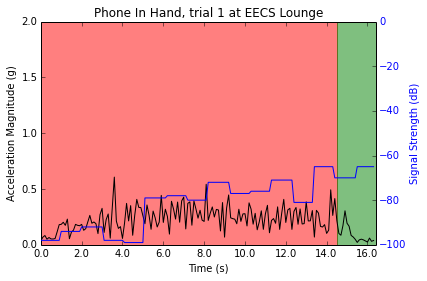

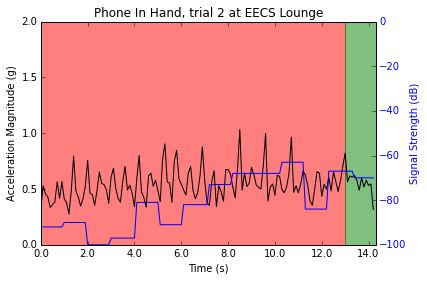

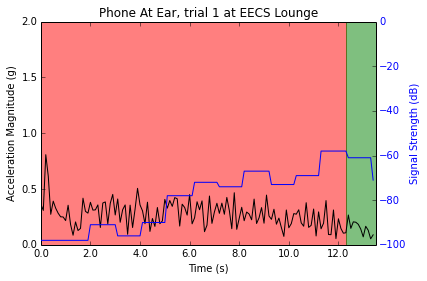

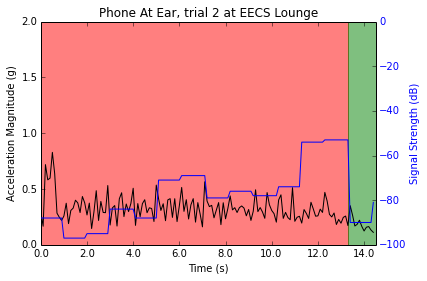

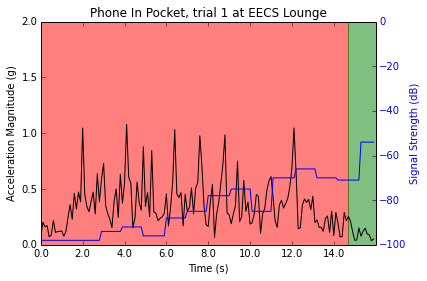

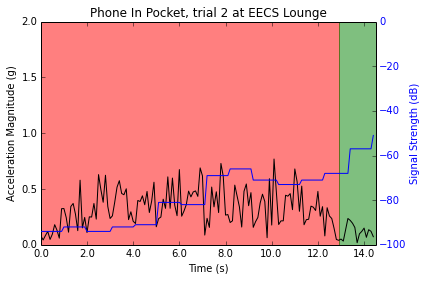

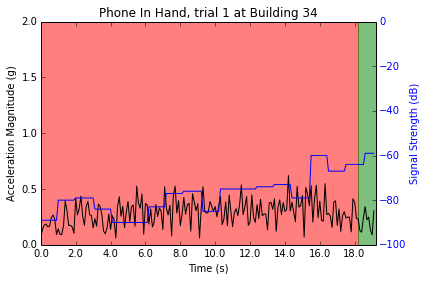

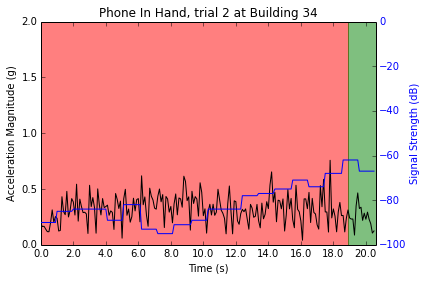

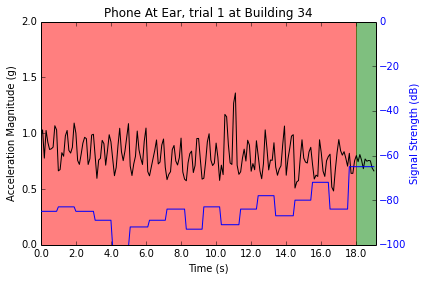

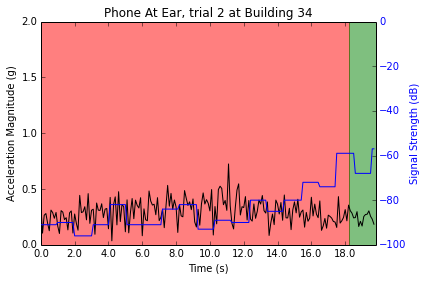

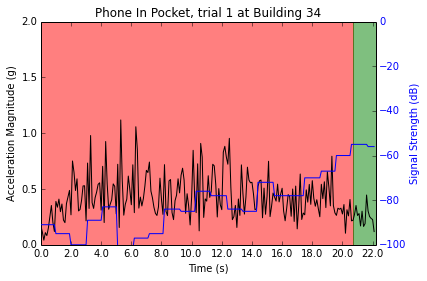

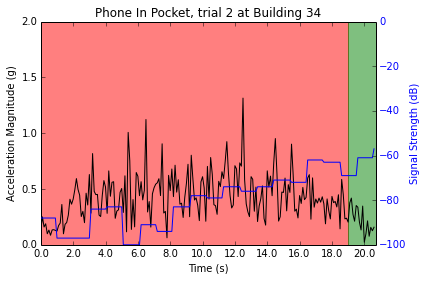

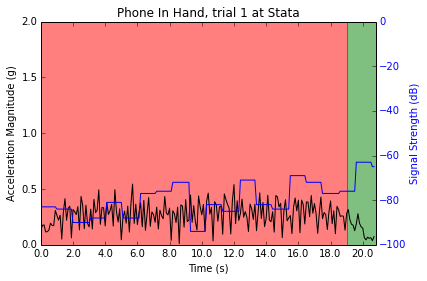

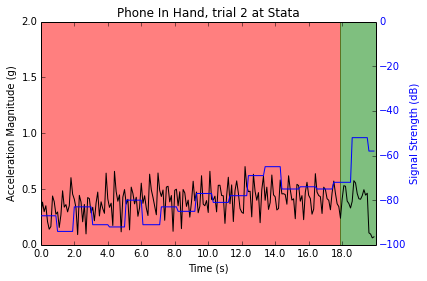

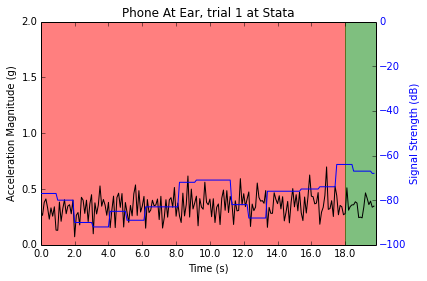

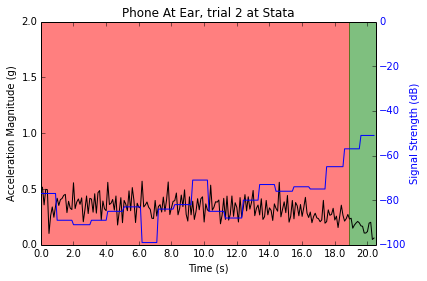

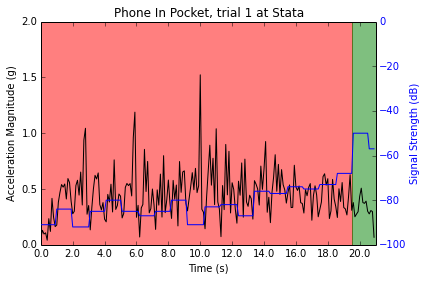

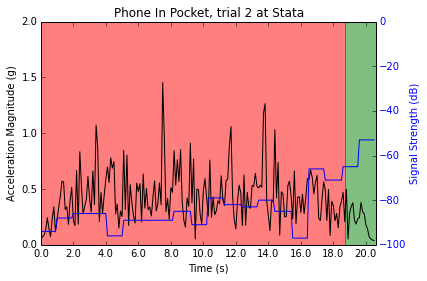

In [4]:
# Convert CSV files to pandas DataFrames
import matplotlib.pyplot as plt
import numpy as np
import math

def magnitude(accel):
    return math.sqrt(accel.values[0] ** 2 + accel.values[1] ** 2 + accel.values[2] ** 2)

use_cases = ["In Hand", "At Ear", "In Pocket"]
locations = ["EECS Lounge", "Building 34", "Stata"]
trials = 2

log_dataframes = []
for i in xrange(1, 19):
    log_file = open("log%d.csv" % i, 'r')
    raw_dataframe = pd.read_csv(log_file, index_col=0)
    
    '''
    rssi_window_size = 20
    raw_dataframe["Smoothed RSSI"] = pd.ewma(raw_dataframe["RSSI"].values, span=rssi_window_size)
    
    acc_window_size = 10
    
    raw_dataframe["Smoothed Acc_X"] = pd.ewma(raw_dataframe["Acc_X"].values, span=acc_window_size)
    
    x_vals = range(len(raw_dataframe["Acc_X"]))
    plt.plot(x_vals, raw_dataframe["Acc_X"].values, 'k',
             x_vals, raw_dataframe["Smoothed Acc_X"].values, 'r')
    plt.title("Log %d: X acceleration vs smoothed" % i)
    plt.show()
    
    raw_dataframe["Smoothed Acc_Y"] = pd.ewma(raw_dataframe["Acc_Y"].values, span=acc_window_size)

    x_vals = range(len(raw_dataframe["Acc_Y"]))
    plt.plot(x_vals, raw_dataframe["Acc_Y"].values, 'k',
             x_vals, raw_dataframe["Smoothed Acc_Y"].values, 'r')
    plt.title("Log %d: Y acceleration vs smoothed" % i)
    plt.show()
    
    raw_dataframe["Smoothed Acc_Z"] = pd.ewma(raw_dataframe["Acc_Z"].values, span=acc_window_size)
    
    x_vals = range(len(raw_dataframe["Acc_Z"]))
    plt.plot(x_vals, raw_dataframe["Acc_Z"].values, 'k',
             x_vals, raw_dataframe["Smoothed Acc_Z"].values, 'r')
    plt.title("Log %d: Z acceleration vs smoothed" % i)
    plt.show()
    
    '''
    acc_mags = raw_dataframe[["Acc_X", "Acc_Y", "Acc_Z"]].apply(magnitude, axis=1)
    #smoothed_acc_mags = raw_dataframe[["Smoothed Acc_X", "Smoothed Acc_Y", "Smoothed Acc_Z"]].apply(magnitude, axis=1)
    x_vals = range(len(acc_mags))
    
    fig, ax1 = plt.subplots()
    ax1.plot(x_vals, acc_mags, 'k')
    ax1.set_xlabel('Time (s)')
    plt.xticks(np.arange(0, len(x_vals), 20.0))
    ax1.set_xticklabels(map(lambda x: x / 10.0, np.arange(0, len(x_vals), 20.0)))
    
    first_unlock = 0
    for j in xrange(len(x_vals)):
        first_unlock = j
        if raw_dataframe["Unlock Requested"].iloc[j] == 1:
            break
    
    ax1.axvspan(0, first_unlock, alpha=0.5, color='red')
    ax1.axvspan(first_unlock, len(x_vals), alpha=0.5, color='green')
    
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel('Acceleration Magnitude (g)', color='k')
    ax1.set_ylim([0.0, 2.0])
    for tl in ax1.get_yticklabels():
        tl.set_color('k')


    ax2 = ax1.twinx()
    ax2.plot(x_vals, raw_dataframe["RSSI"], 'b')
    ax2.set_ylabel('Signal Strength (dB)', color='b')
    ax2.set_ylim([-100, 0])
    for tl in ax2.get_yticklabels():
        tl.set_color('b')
        
    location = locations[(i - 1) / 6]
    use_case = use_cases[((i - 1) / trials) % len(use_cases)]
    trial = (i - 1) % trials + 1
    
    plt.title("Phone %s, trial %d at %s" % (use_case, trial, location))
        
    if i == 12:
        plt.savefig("developed.png", dpi=300)
        
    plt.show()
    
    '''
    cleaned_dataframe = raw_dataframe.drop("RSSI", axis=1).drop("Acc_X", axis=1).drop("Acc_Y", axis=1).drop("Acc_Z", axis=1)
    
    log_dataframes.append(cleaned_dataframe)
    '''
    log_dataframes.append(raw_dataframe)
    log_file.close()

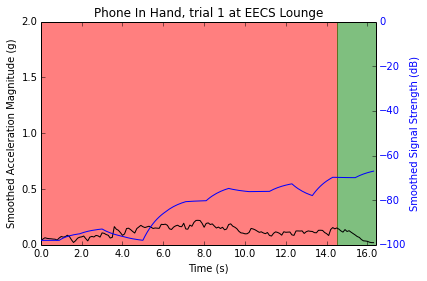

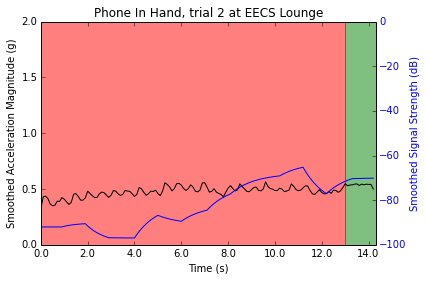

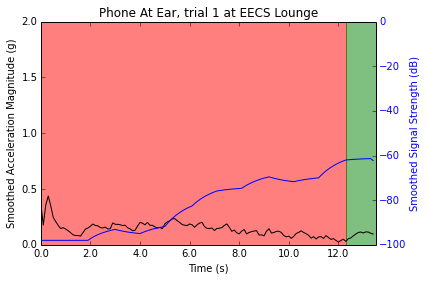

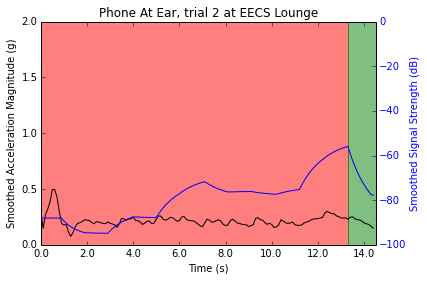

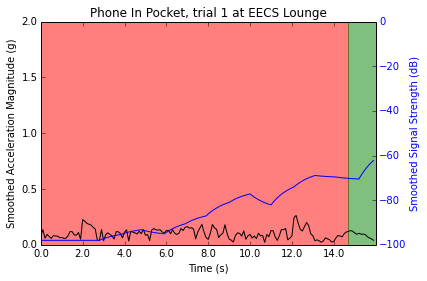

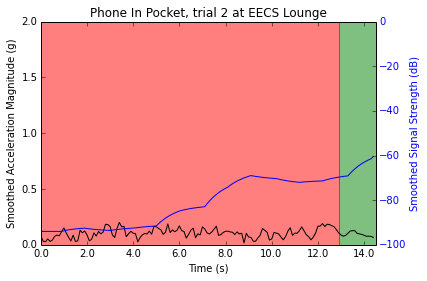

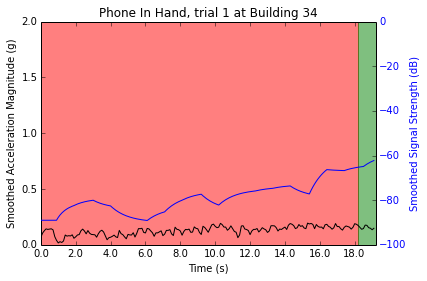

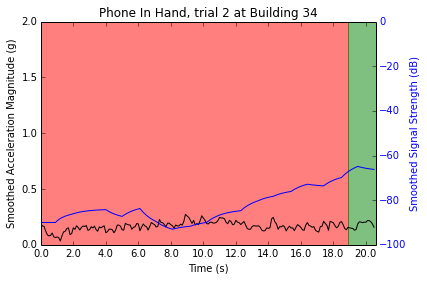

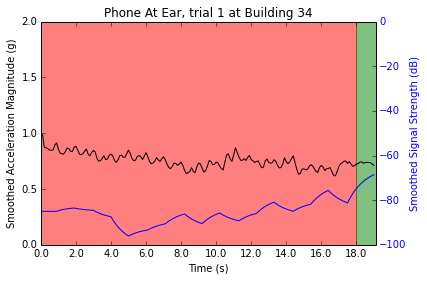

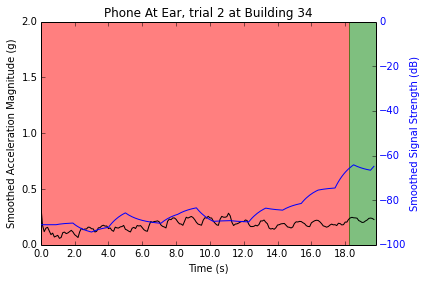

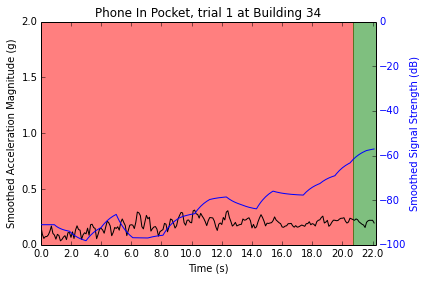

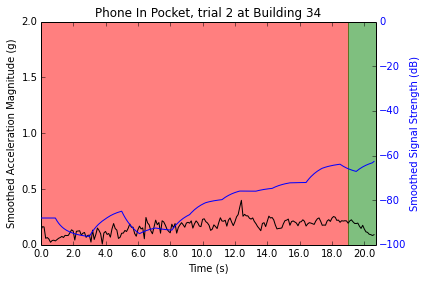

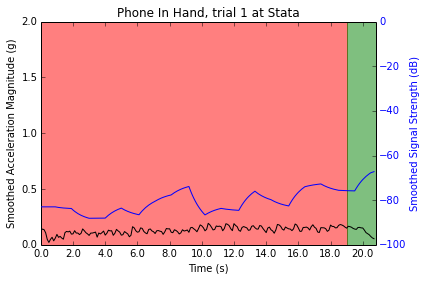

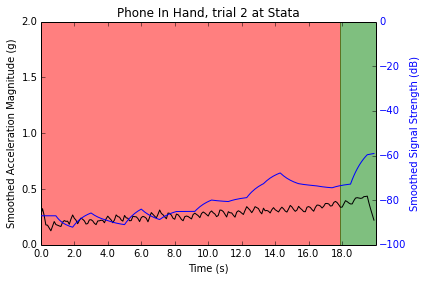

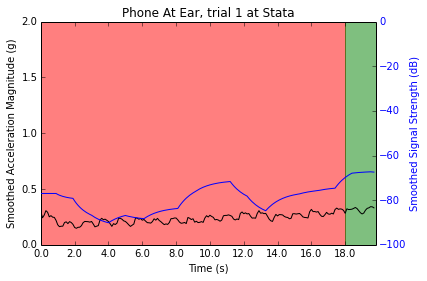

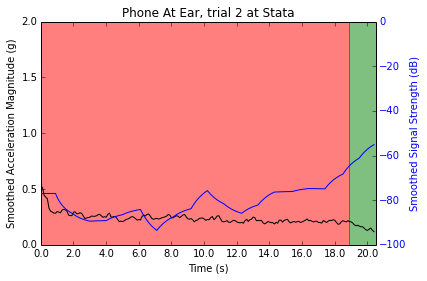

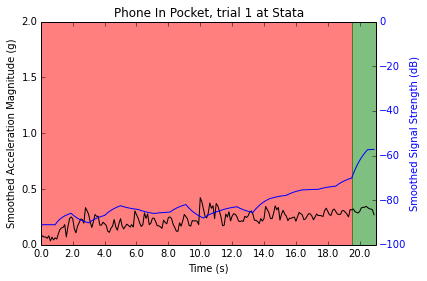

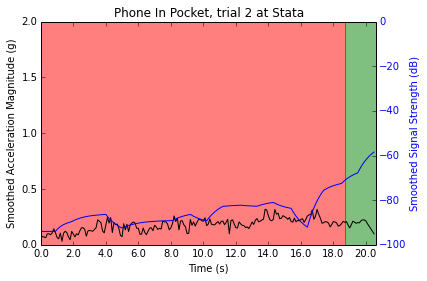

In [5]:
for i in xrange(1, len(log_dataframes) + 1):
    raw_dataframe = log_dataframes[i - 1]
    rssi_window_size = 20
    raw_dataframe["Smoothed RSSI"] = pd.ewma(raw_dataframe["RSSI"].values, span=rssi_window_size)
    
    acc_window_size = 10
    
    raw_dataframe["Smoothed Acc_X"] = pd.ewma(raw_dataframe["Acc_X"].values, span=acc_window_size)
    raw_dataframe["Smoothed Acc_Y"] = pd.ewma(raw_dataframe["Acc_Y"].values, span=acc_window_size)
    raw_dataframe["Smoothed Acc_Z"] = pd.ewma(raw_dataframe["Acc_Z"].values, span=acc_window_size)
    
    smoothed_acc_mags = raw_dataframe[["Smoothed Acc_X", "Smoothed Acc_Y", "Smoothed Acc_Z"]].apply(magnitude, axis=1)
    x_vals = range(len(smoothed_acc_mags))
    
    fig, ax1 = plt.subplots()
    ax1.plot(x_vals, smoothed_acc_mags, 'k')
    ax1.set_xlabel('Time (s)')
    plt.xticks(np.arange(0, len(x_vals), 20.0))
    ax1.set_xticklabels(map(lambda x: x / 10.0, np.arange(0, len(x_vals), 20.0)))
    
    first_unlock = 0
    for j in xrange(len(x_vals)):
        first_unlock = j
        if raw_dataframe["Unlock Requested"].iloc[j] == 1:
            break
    
    ax1.axvspan(0, first_unlock, alpha=0.5, color='red')
    ax1.axvspan(first_unlock, len(x_vals), alpha=0.5, color='green')
    
    # Make the y-axis label and tick labels match the line color.
    ax1.set_ylabel('Smoothed Acceleration Magnitude (g)', color='k')
    ax1.set_ylim([0.0, 2.0])
    for tl in ax1.get_yticklabels():
        tl.set_color('k')

    ax2 = ax1.twinx()
    ax2.plot(x_vals, raw_dataframe["Smoothed RSSI"], 'b')
    ax2.set_ylabel('Smoothed Signal Strength (dB)', color='b')
    ax2.set_ylim([-100, 0])
    for tl in ax2.get_yticklabels():
        tl.set_color('b')
        
    location = locations[(i - 1) / 6]
    use_case = use_cases[((i - 1) / trials) % len(use_cases)]
    trial = (i - 1) % trials + 1
    
    plt.title("Phone %s, trial %d at %s" % (use_case, trial, location))
        
    if i == 12:
        plt.savefig("improved.png", dpi=300)
        
    plt.show()

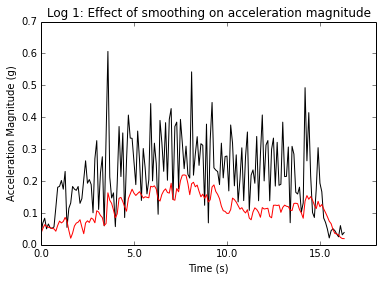

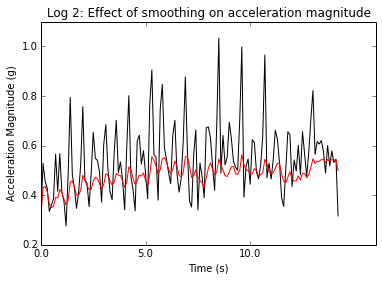

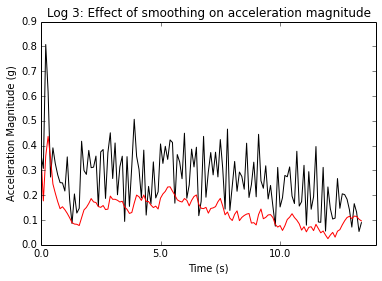

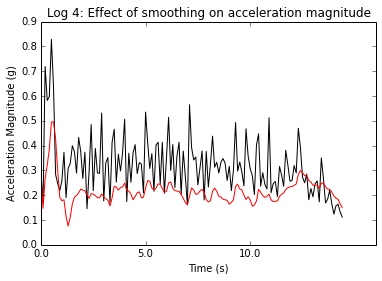

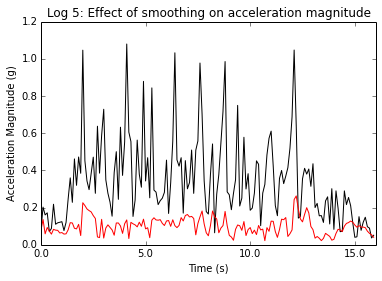

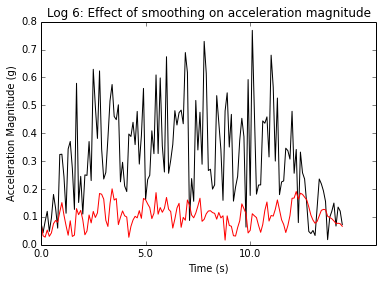

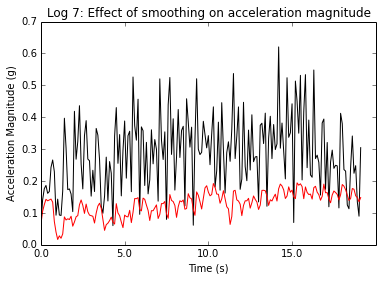

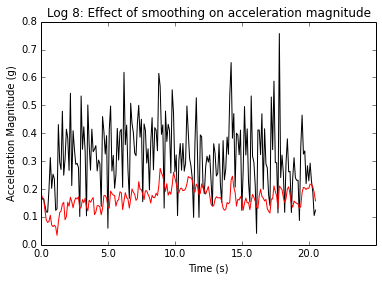

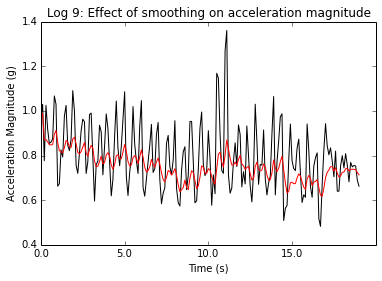

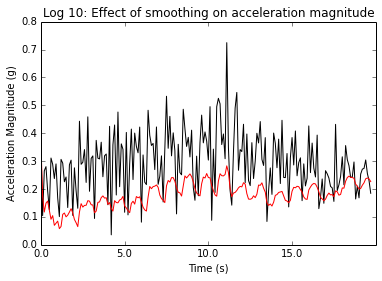

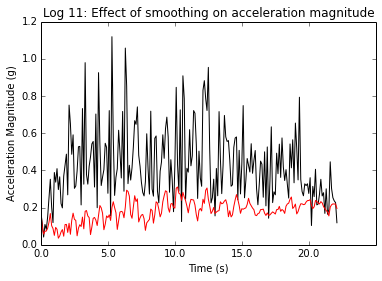

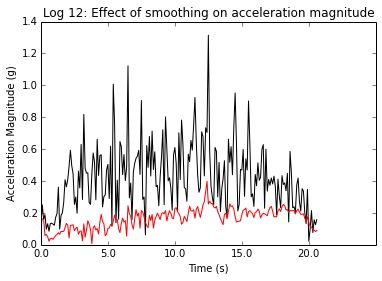

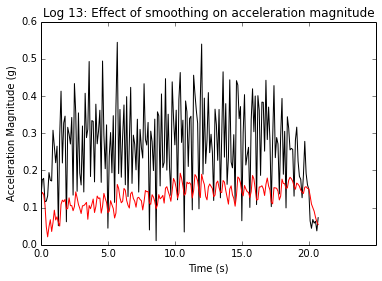

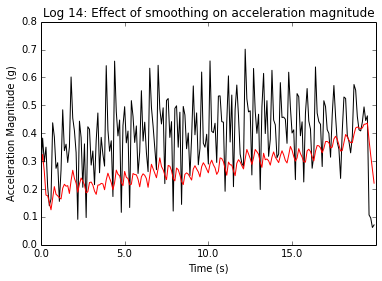

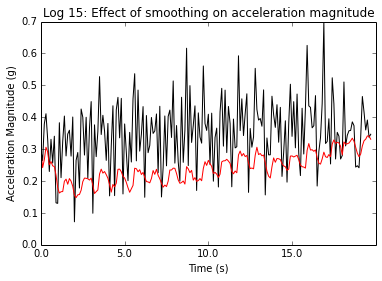

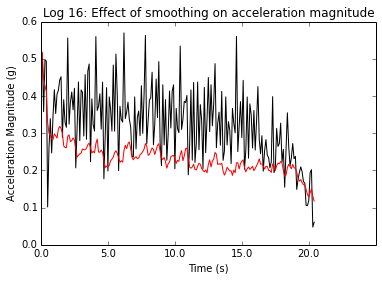

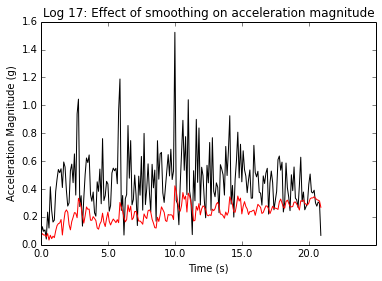

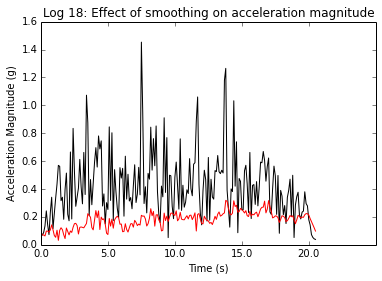

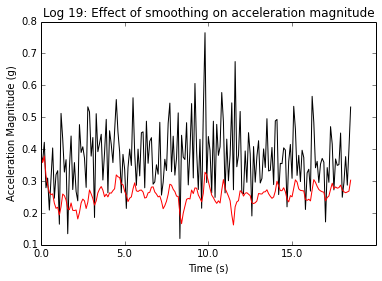

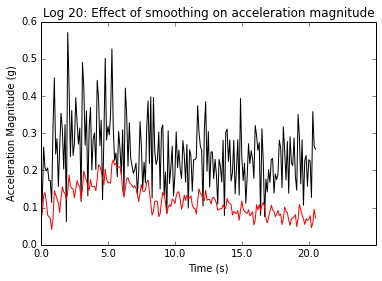

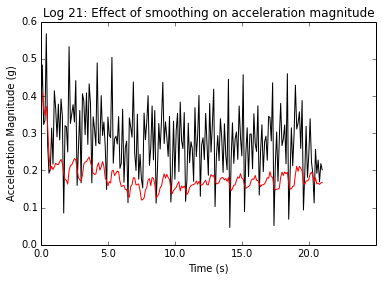

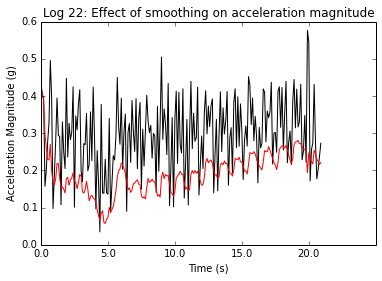

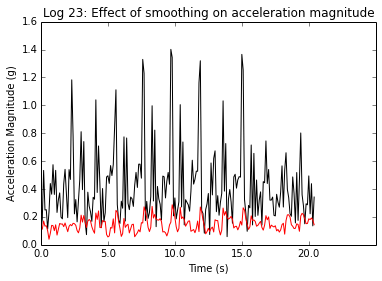

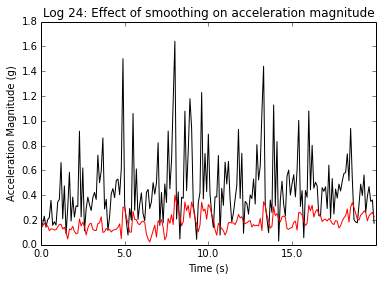

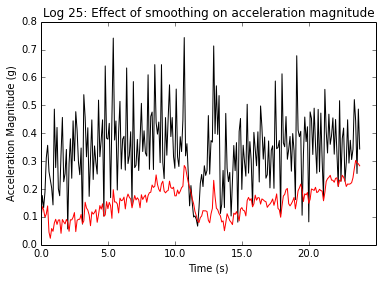

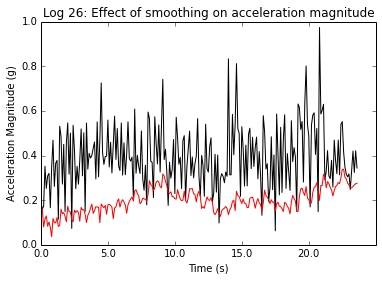

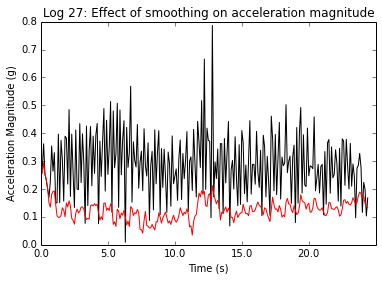

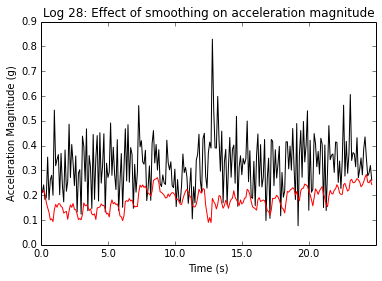

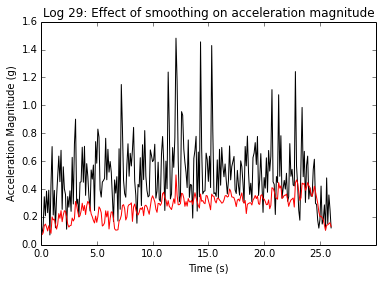

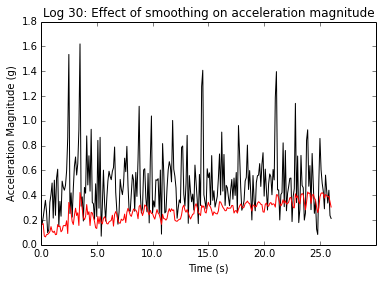

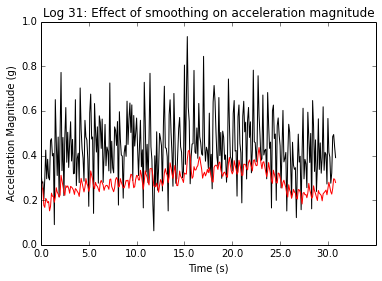

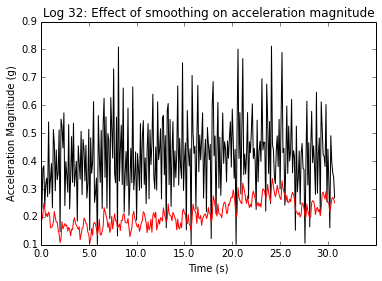

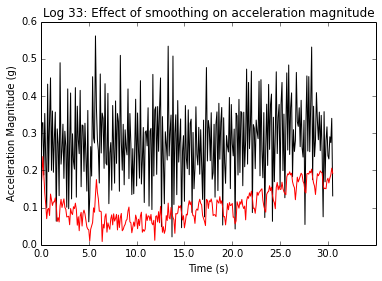

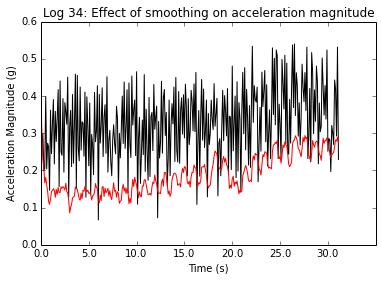

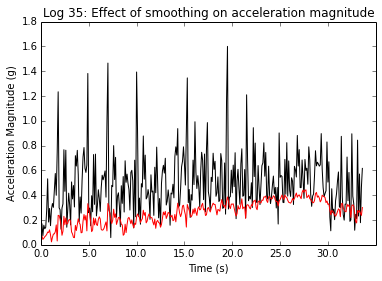

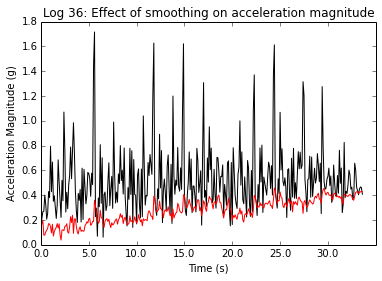

In [27]:
# Convert CSV files to pandas DataFrames
import matplotlib.pyplot as plt
import numpy as np
import math

def magnitude(accel):
    return math.sqrt(accel.values[0] ** 2 + accel.values[1] ** 2 + accel.values[2] ** 2)

log_dataframes = []
for i in xrange(1, 37):
    log_file = open("log%d.csv" % i, 'r')
    raw_dataframe = pd.read_csv(log_file, index_col=0)
    
    rssi_window_size = 20
    raw_dataframe["Smoothed RSSI"] = pd.ewma(raw_dataframe["RSSI"].values, span=rssi_window_size)
    
    acc_window_size = 10
    
    raw_dataframe["Smoothed Acc_X"] = pd.ewma(raw_dataframe["Acc_X"].values, span=acc_window_size)
    '''
    x_vals = range(len(raw_dataframe["Acc_X"]))
    plt.plot(x_vals, raw_dataframe["Acc_X"].values, 'k',
             x_vals, raw_dataframe["Smoothed Acc_X"].values, 'r')
    plt.title("Log %d: X acceleration vs smoothed" % i)
    plt.show()
    '''
    
    raw_dataframe["Smoothed Acc_Y"] = pd.ewma(raw_dataframe["Acc_Y"].values, span=acc_window_size)
    '''
    x_vals = range(len(raw_dataframe["Acc_Y"]))
    plt.plot(x_vals, raw_dataframe["Acc_Y"].values, 'k',
             x_vals, raw_dataframe["Smoothed Acc_Y"].values, 'r')
    plt.title("Log %d: Y acceleration vs smoothed" % i)
    plt.show()
    '''
    
    raw_dataframe["Smoothed Acc_Z"] = pd.ewma(raw_dataframe["Acc_Z"].values, span=acc_window_size)
    '''
    x_vals = range(len(raw_dataframe["Acc_Z"]))
    plt.plot(x_vals, raw_dataframe["Acc_Z"].values, 'k',
             x_vals, raw_dataframe["Smoothed Acc_Z"].values, 'r')
    plt.title("Log %d: Z acceleration vs smoothed" % i)
    plt.show()
    '''
    
    acc_mags = raw_dataframe[["Acc_X", "Acc_Y", "Acc_Z"]].apply(magnitude, axis=1)
    smoothed_acc_mags = raw_dataframe[["Smoothed Acc_X", "Smoothed Acc_Y", "Smoothed Acc_Z"]].apply(magnitude, axis=1)
    x_vals = range(len(acc_mags))
    plt.plot(x_vals, acc_mags, 'k',
             x_vals, smoothed_acc_mags, 'r')
    plt.xticks(np.arange(0, len(x_vals), 50.0))
    axes = plt.gca()
    axes.set_xticklabels(map(lambda x: x / 10.0, np.arange(0, len(x_vals), 50.0)))
    plt.xlabel("Time (s)")
    plt.ylabel("Acceleration Magnitude (g)")
    plt.title("Log %d: Effect of smoothing on acceleration magnitude" % i)
    plt.show()
    
    cleaned_dataframe = raw_dataframe.drop("RSSI", axis=1).drop("Acc_X", axis=1).drop("Acc_Y", axis=1).drop("Acc_Z", axis=1)
    
    log_dataframes.append(cleaned_dataframe)
    log_file.close()

In [13]:
# Use decision tree and visualize tree
from sklearn.externals.six import StringIO
from sklearn import tree

accuracies = []
rssi_thresholds = []
acc_mag_thresholds = []
features = ["Smoothed Acceleration Magnitude", "Smoothed RSSI"]
for left_out in xrange(len(log_dataframes)):
    training_df = pd.DataFrame()
    training_label_series = pd.Series()
    for log_index in filter(lambda x: x != left_out, xrange(len(log_dataframes))):
        acc_mags = log_dataframes[log_index][["Smoothed Acc_X", "Smoothed Acc_Y", "Smoothed Acc_Z"]].apply(magnitude, axis=1)
        training_df = training_df.append(pd.concat([acc_mags, log_dataframes[log_index]["Smoothed RSSI"]], axis=1))
        training_label_series = training_label_series.append(log_dataframes[log_index]["Unlock Requested"])
    
    dt_clf = tree.DecisionTreeClassifier(max_depth=2)
    dt_clf.fit(training_df.as_matrix(), training_label_series.values)
    
    acc_mags = log_dataframes[log_index][["Smoothed Acc_X", "Smoothed Acc_Y", "Smoothed Acc_Z"]].apply(magnitude, axis=1)
    target_df = pd.concat([acc_mags, log_dataframes[log_index]["Smoothed RSSI"]], axis=1)
    target_label_series = log_dataframes[log_index]["Unlock Requested"]
    
    #predicted = dt_clf.predict(target_df)
    
    accuracy = dt_clf.score(target_df.as_matrix(), target_label_series.values)
    print "Left out log %d; Accuracy:%f" % (left_out + 1, accuracy)
    accuracies.append(accuracy)
    
    # One model only uses RSSI - ignore it for now?
    if dt_clf.tree_.feature[dt_clf.tree_.children_right[0]] != 1:
        rssi_threshold = dt_clf.tree_.threshold[0]
        print "Smoothed RSSI threshold: %f" % rssi_threshold
        rssi_thresholds.append(rssi_threshold)
    
        acc_mag_threshold = dt_clf.tree_.threshold[dt_clf.tree_.children_right[0]]
        print "Smoothed Acceleration Magnitude threshold: %f" % acc_mag_threshold
        acc_mag_thresholds.append(acc_mag_threshold)
    
    print "" # Newline for spacing
    
    # Run dot -Tpdf log<num>.dot -o log<num>.pdf to generate graph
    with open("log%d.dot" % (left_out + 1), 'w') as f:
        f = tree.export_graphviz(dt_clf, out_file=f, feature_names=features)
                     
print "Average accuracy:%f" % (sum(accuracies)/len(accuracies))
if len(rssi_thresholds) != 0:
    print "Average Smoothed RSSI threshold:%f" % (sum(rssi_thresholds)/len(rssi_thresholds))
if len(acc_mag_thresholds) != 0:
    print "Average Smoothed acceleration magnitude threshold:%f" % (sum(acc_mag_thresholds)/len(acc_mag_thresholds))

Left out log 1; Accuracy:1.000000

Left out log 2; Accuracy:1.000000

Left out log 3; Accuracy:1.000000

Left out log 4; Accuracy:1.000000

Left out log 5; Accuracy:1.000000

Left out log 6; Accuracy:1.000000

Left out log 7; Accuracy:1.000000

Left out log 8; Accuracy:1.000000

Left out log 9; Accuracy:1.000000

Left out log 10; Accuracy:1.000000

Left out log 11; Accuracy:1.000000

Left out log 12; Accuracy:1.000000

Left out log 13; Accuracy:1.000000

Left out log 14; Accuracy:1.000000

Left out log 15; Accuracy:1.000000

Left out log 16; Accuracy:1.000000

Left out log 17; Accuracy:1.000000

Left out log 18; Accuracy:1.000000

Left out log 19; Accuracy:1.000000

Left out log 20; Accuracy:1.000000

Left out log 21; Accuracy:1.000000

Left out log 22; Accuracy:1.000000

Left out log 23; Accuracy:1.000000

Left out log 24; Accuracy:1.000000

Left out log 25; Accuracy:1.000000

Left out log 26; Accuracy:1.000000

Left out log 27; Accuracy:1.000000

Left out log 28; Accuracy:1.000000

L

In [6]:
# Test manual "decision tree" model on unsmoothed data
target_df = pd.DataFrame()
training_labels = pd.Series()
for log_index in xrange(len(log_dataframes)):
    acc_mags = log_dataframes[log_index][["Acc_X", "Acc_Y", "Acc_Z"]].apply(magnitude, axis=1)
    
    target_df = target_df.append(pd.concat([acc_mags, log_dataframes[log_index]["RSSI"]], axis=1))
    training_labels = training_labels.append(log_dataframes[log_index]["Unlock Requested"])
target_labels = []
for sample in target_df.as_matrix():
    # First check RSSI
    current_class = 0 # No unlock requested
    if sample[1] >= -61.0:
        # Then check acceleration magnitude
        if sample[0] <= 0.10:
            current_class = 1 # Unlock requested
    target_labels.append(current_class)

false_positives = 0
false_negatives = 0
for i in xrange(len(training_labels)):
    if training_labels.values[i] != target_labels[i]:
        if training_labels.values[i] == 0:
            false_positives += 1
        else:
            false_negatives += 1

err = (false_positives + false_negatives) / float(len(training_labels))
print "Model error of %.2f%% over %d samples" % (err * 100.0, len(target_labels))
print "False positive percentage: %.2f%%" % (100.0 * false_positives / float(len(filter(lambda x: x == 0, training_labels.values))))
print "False negative percentage: %.2f%%" % (100.0 * false_negatives / float(len(filter(lambda x: x == 1, training_labels.values))))

Model error of 7.68% over 3335 samples
False positive percentage: 0.10%
False negative percentage: 91.01%


In [9]:
# Test manual "decision tree" model on smoothed data
target_df = pd.DataFrame()
training_labels = pd.Series()
for log_index in xrange(len(log_dataframes)):
    acc_mags = log_dataframes[log_index][["Smoothed Acc_X", "Smoothed Acc_Y", "Smoothed Acc_Z"]].apply(magnitude, axis=1)
    
    target_df = target_df.append(pd.concat([acc_mags, log_dataframes[log_index]["Smoothed RSSI"]], axis=1))
    training_labels = training_labels.append(log_dataframes[log_index]["Unlock Requested"])
target_labels = []
for sample in target_df.as_matrix():
    # First check RSSI
    current_class = 0 # No unlock requested
    if sample[1] >= -61.0:
        # Then check acceleration magnitude
        if sample[0] <= 0.10:
            current_class = 1 # Unlock requested
    target_labels.append(current_class)

false_positives = 0
false_negatives = 0
for i in xrange(len(training_labels)):
    if training_labels.values[i] != target_labels[i]:
        if training_labels.values[i] == 0:
            false_positives += 1
        else:
            false_negatives += 1

err = (false_positives + false_negatives) / float(len(training_labels))
print "Model error of %.2f%% over %d samples" % (err * 100.0, len(target_labels))
print "False positive percentage: %.2f%%" % (100.0 * false_positives / float(len(filter(lambda x: x == 0, training_labels.values))))
print "False negative percentage: %.2f%%" % (100.0 * false_negatives / float(len(filter(lambda x: x == 1, training_labels.values))))

Model error of 8.28% over 3335 samples
False positive percentage: 0.00%
False negative percentage: 99.28%


In [26]:
# Test per walk - unsmoothed data
successes = 0
fp_count = 0
for i in xrange(len(log_dataframes)):
    acc_mags = log_dataframes[i][["Acc_X", "Acc_Y", "Acc_Z"]].apply(magnitude, axis=1)
    target_df = pd.concat([acc_mags, log_dataframes[i]["RSSI"]], axis=1)
    training_labels = log_dataframes[i]["Unlock Requested"]
    
    target_labels = []
    for sample in target_df.as_matrix():
        # First check RSSI
        current_class = 0 # No unlock requested
        if sample[1] >= -61.0:
            # Then check acceleration magnitude
            if sample[0] <= 0.20:
                current_class = 1 # Unlock requested
        target_labels.append(current_class)
        
    false_positives = 0
    false_negatives = 0
    for i in xrange(len(training_labels)):
        if training_labels.values[i] != target_labels[i]:
            if training_labels.values[i] == 0:
                false_positives += 1
            else:
                false_negatives += 1

    err = (false_positives + false_negatives) / float(len(training_labels))
    #print "Model error of %.2f%% over %d samples in log %d" % (err * 100.0, len(target_labels), i)
    
    total_negative = float(len(filter(lambda x: x == 0, training_labels.values)))
    if false_positives > 0:
        fp_count += 1
    '''
    if total_negative > 0:
        print "False positive percentage: %.2f%%" % (100.0 * false_positives / total_negative)
    else:
        print "No false positives"
    '''
    
    total_positive = float(len(filter(lambda x: x == 1, training_labels.values)))
    '''
    if total_positive > 0:
        print "False negative percentage: %.2f%%" % (100.0 * false_negatives / total_positive)
    else:
        print "No false negatives"
    '''
    
    #print "Training: "
    #print training_labels.values
    #print "Target: "
    #print target_labels
    
    if (false_positives == 0) and (total_positive == 0.0 or false_negatives / total_positive != 1.0):
        successes += 1
        #print "Success!"
    else:
        #print "Failed"
        pass
    #print ""
        
print "Success rate: %.2f%%" % (100.0 * successes / float(len(log_dataframes)))
print "False positive events: %d" % fp_count

Success rate: 44.44%
False positive events: 4


In [27]:
# Test per walk - smoothed data
successes = 0
fp_count = 0
for i in xrange(len(log_dataframes)):
    acc_mags = log_dataframes[i][["Smoothed Acc_X", "Smoothed Acc_Y", "Smoothed Acc_Z"]].apply(magnitude, axis=1)
    target_df = pd.concat([acc_mags, log_dataframes[i]["Smoothed RSSI"]], axis=1)
    training_labels = log_dataframes[i]["Unlock Requested"]
    
    target_labels = []
    for sample in target_df.as_matrix():
        # First check RSSI
        current_class = 0 # No unlock requested
        if sample[1] >= -61.0:
            # Then check acceleration magnitude
            if sample[0] <= 0.10:
                current_class = 1 # Unlock requested
        target_labels.append(current_class)
        
    false_positives = 0
    false_negatives = 0
    for i in xrange(len(training_labels)):
        if training_labels.values[i] != target_labels[i]:
            if training_labels.values[i] == 0:
                false_positives += 1
            else:
                false_negatives += 1

    err = (false_positives + false_negatives) / float(len(training_labels))
    #print "Model error of %.2f%% over %d samples in log %d" % (err * 100.0, len(target_labels), i)
    
    total_negative = float(len(filter(lambda x: x == 0, training_labels.values)))
    if false_positives > 0:
        fp_count += 1
    '''
    if total_negative > 0:
        print "False positive percentage: %.2f%%" % (100.0 * false_positives / total_negative)
    else:
        print "No false positives"
    '''
    
    total_positive = float(len(filter(lambda x: x == 1, training_labels.values)))
    '''
    if total_positive > 0:
        print "False negative percentage: %.2f%%" % (100.0 * false_negatives / total_positive)
    else:
        print "No false negatives"
    '''
    
    #print "Training: "
    #print training_labels.values
    #print "Target: "
    #print target_labels
    
    if (false_positives == 0) and (total_positive == 0.0 or false_negatives / total_positive != 1.0):
        successes += 1
        #print "Success!"
    else:
        #print "Failed"
        pass
    #print ""
        
print "Success rate: %.2f%%" % (100.0 * successes / float(len(log_dataframes)))
print "False positive events: %d" % fp_count

Success rate: 11.11%
False positive events: 0
